In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

tf.__version__
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator()

from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras.layers.pooling import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_path = 'data2/train'
valid_path = 'data2/valid'
test_path = 'data2/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=64)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=64)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=64, shuffle=False)

Found 28446 images belonging to 80 classes.
Found 4800 images belonging to 80 classes.
Found 3200 images belonging to 80 classes.


In [6]:
from tensorflow.keras.models import load_model
model = load_model('models/model_4.h5')

In [7]:
def prepare_image(file):
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [8]:
test_labels = test_batches.classes

In [9]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [10]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(60, 60))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix2'+'.jpg')

Confusion matrix, without normalization
[[34  0  0 ...  0  0  0]
 [ 1 32  0 ...  0  0  0]
 [ 0  0 35 ...  1  0  0]
 ...
 [ 0  0  1 ... 28  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 1  0  0 ...  0  0 29]]


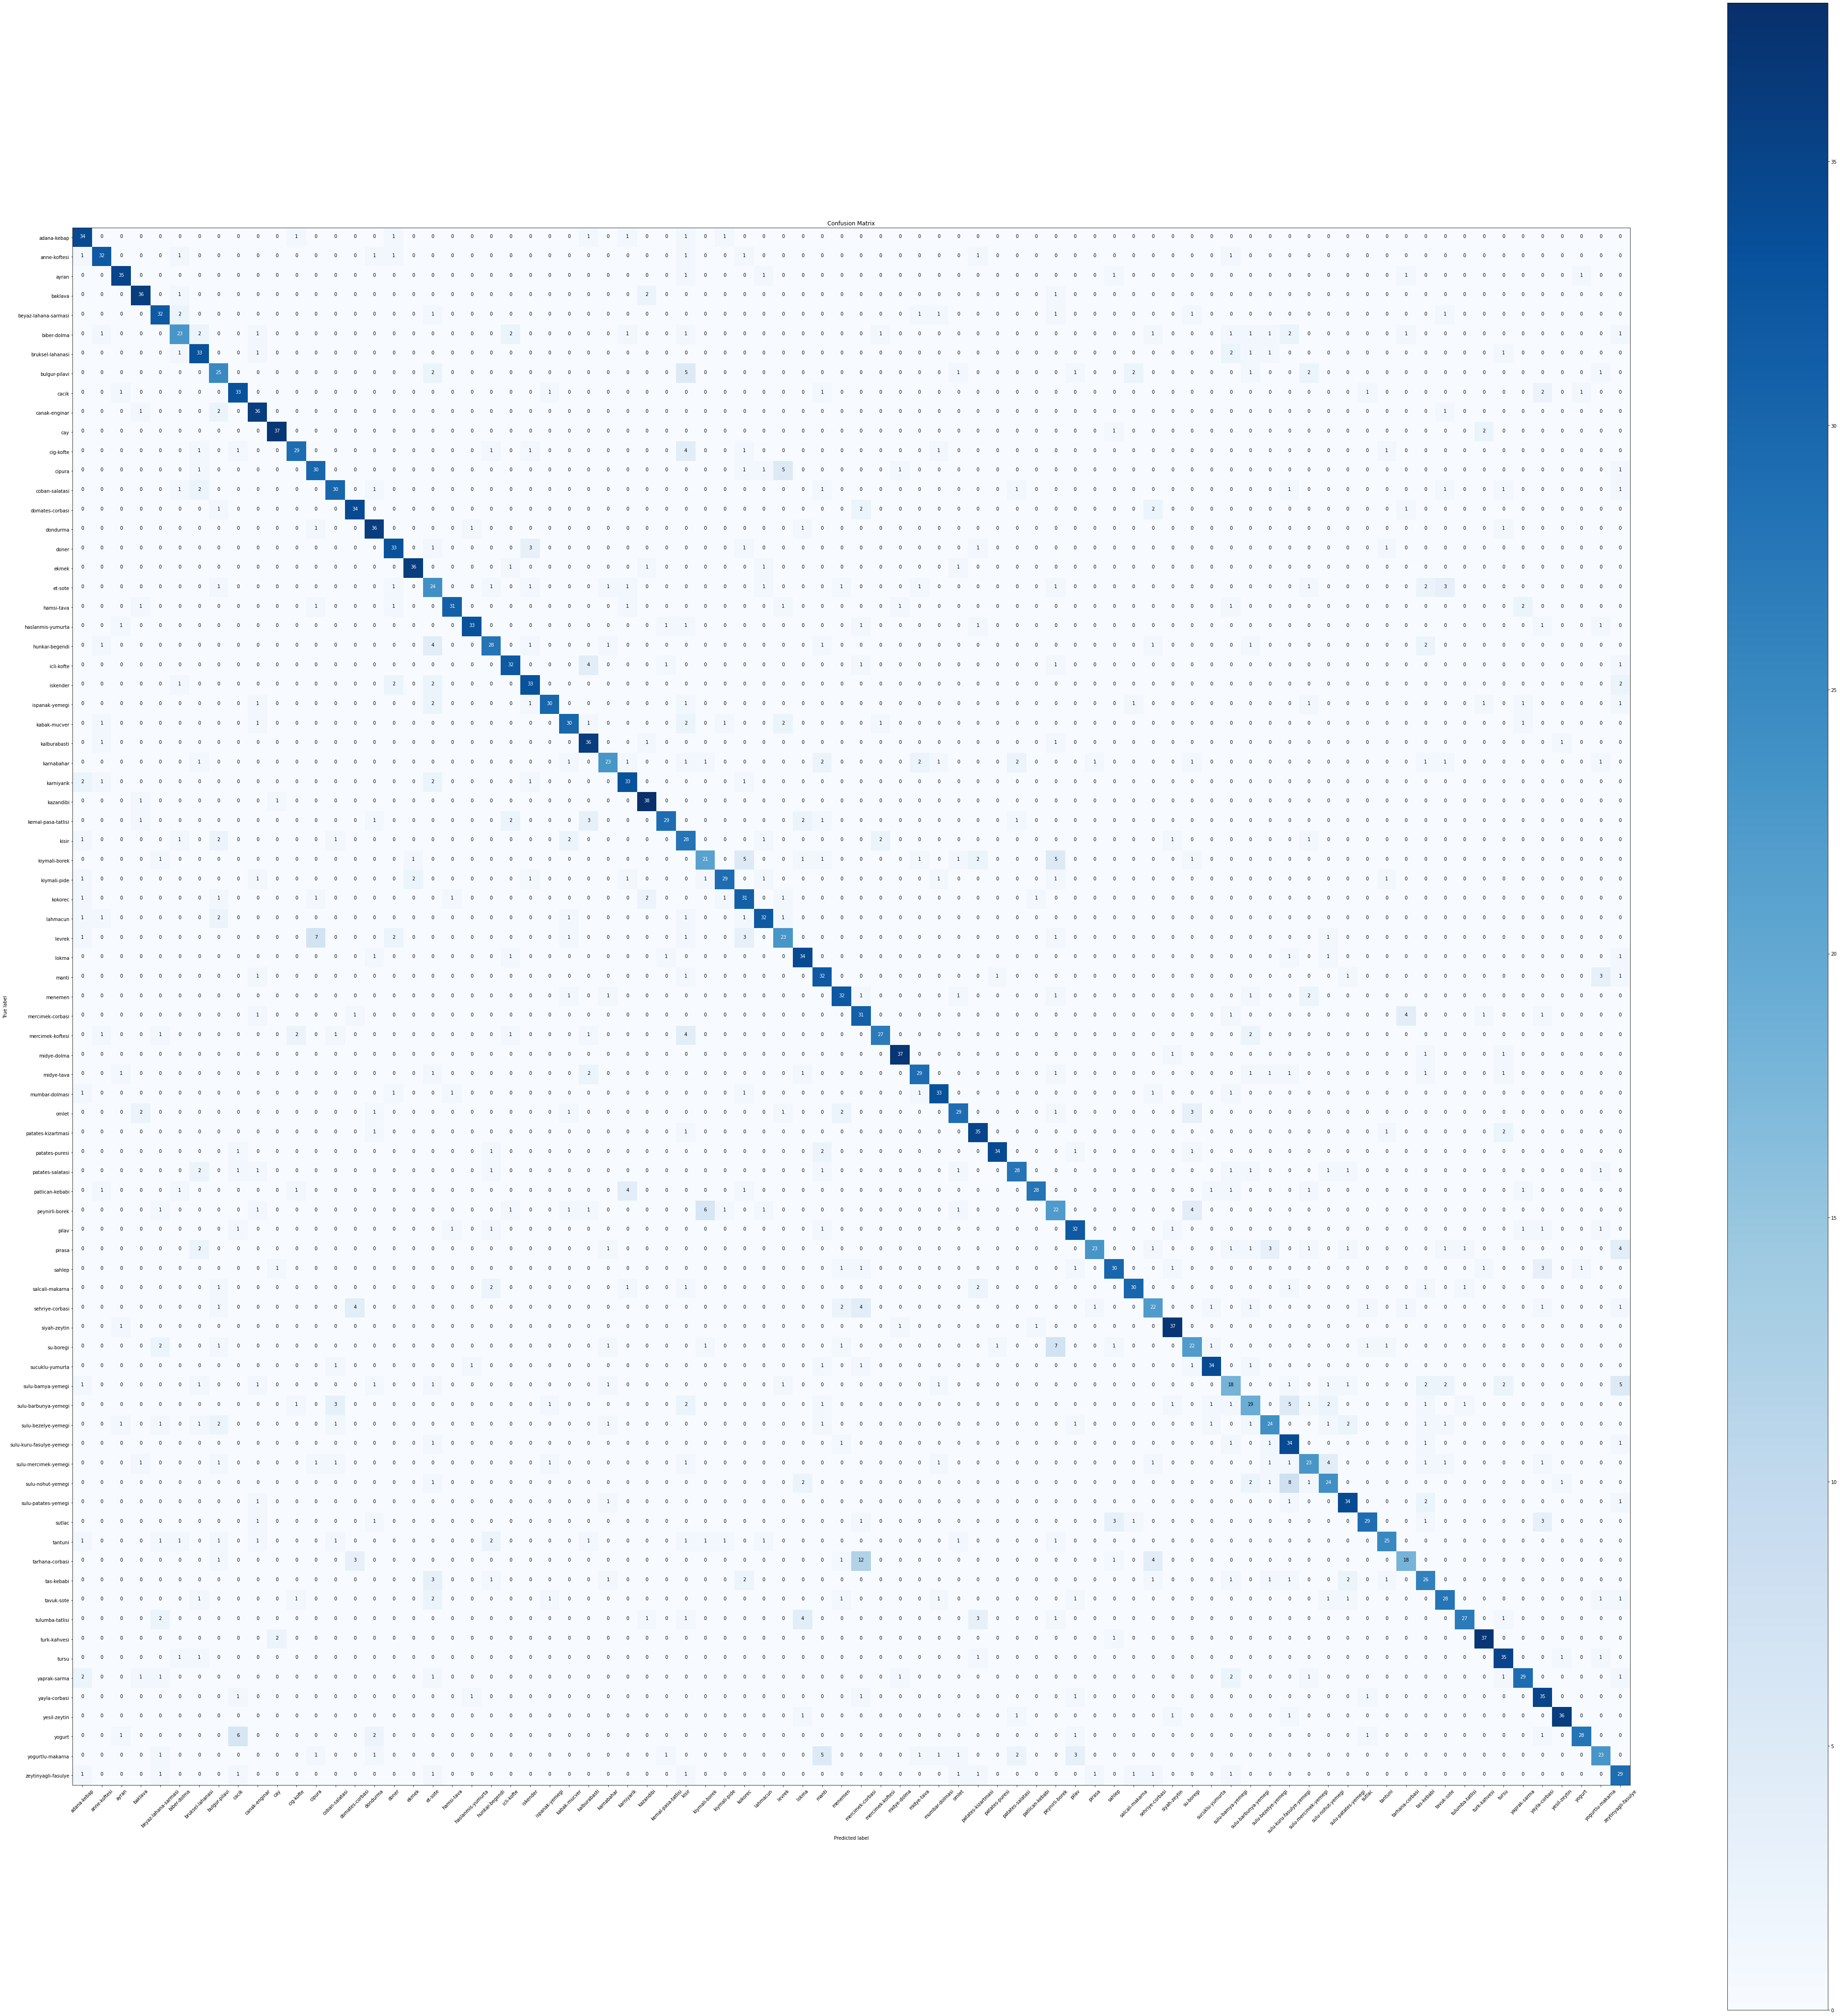

In [12]:
plot_confusion_matrix(cm=cm, classes=test_batches.class_indices,title='Confusion Matrix')

In [13]:
from sklearn.metrics import accuracy_score
y_true = test_labels
y_pred = predictions.argmax(axis=1)
accuracy_score(y_true, y_pred)

0.746875

In [14]:
from sklearn.metrics import precision_score
y_true = test_labels
y_pred = predictions.argmax(axis=1)
print(np.average(precision_score(y_true, y_pred, average=None)))

0.7560609586499764
